In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
for col in df.columns:
    print(col,': ', df[col].unique())
    print()

class :  ['p' 'e']

cap-shape :  ['x' 'b' 's' 'f' 'k' 'c']

cap-surface :  ['s' 'y' 'f' 'g']

cap-color :  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

bruises :  ['t' 'f']

odor :  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

gill-attachment :  ['f' 'a']

gill-spacing :  ['c' 'w']

gill-size :  ['n' 'b']

gill-color :  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

stalk-shape :  ['e' 't']

stalk-root :  ['e' 'c' 'b' 'r' '?']

stalk-surface-above-ring :  ['s' 'f' 'k' 'y']

stalk-surface-below-ring :  ['s' 'f' 'y' 'k']

stalk-color-above-ring :  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

stalk-color-below-ring :  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

veil-type :  ['p']

veil-color :  ['w' 'n' 'o' 'y']

ring-number :  ['o' 't' 'n']

ring-type :  ['p' 'e' 'l' 'f' 'n']

spore-print-color :  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']

population :  ['s' 'n' 'a' 'v' 'y' 'c']

habitat :  ['u' 'g' 'm' 'd' 'p' 'w' 'l']



In [ ]:
#Since veil-type has single value so we can remove this column
df.drop('veil-type', axis=1, inplace=True)

In [10]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

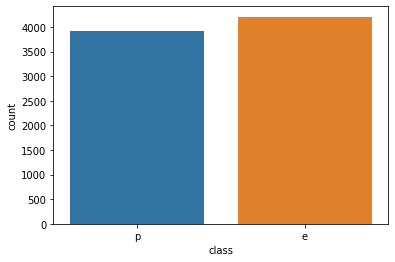

In [14]:
sns.countplot(df['class'])

Data seems to balanced

In [41]:
df.columns[1:]

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [43]:
df2 = df[df['class']=='p'].groupby(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']).size().reset_index().rename(columns={0:'count'})


In [53]:
df3 = df[df['class']=='e'].groupby(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']).size().reset_index().rename(columns={0:'count'})


In [48]:
df.columns[1:]

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [57]:
for col, col1 in zip(df3.columns, df2.columns):
    print(col, ': ', df3[col].unique())
    print(col1, ': ', df2[col].unique())
    print()

cap-shape :  ['b' 'f' 'k' 's' 'x']
cap-shape :  ['b' 'c' 'f' 'k' 'x']

cap-surface :  ['f' 's' 'y']
cap-surface :  ['f' 'g' 's' 'y']

cap-color :  ['g' 'w' 'n' 'y' 'c' 'e' 'b' 'p' 'r' 'u']
cap-color :  ['n' 'y' 'w' 'b' 'p' 'g' 'e' 'c']

bruises :  ['f' 't']
bruises :  ['f' 't']

odor :  ['n' 'a' 'l']
odor :  ['n' 'f' 's' 'y' 'p' 'm' 'c']

gill-attachment :  ['f' 'a']
gill-attachment :  ['f' 'a']

gill-spacing :  ['w' 'c']
gill-spacing :  ['c' 'w']

gill-size :  ['b' 'n']
gill-size :  ['n' 'b']

gill-color :  ['g' 'p' 'w' 'n' 'o' 'y' 'k' 'u' 'h' 'e']
gill-color :  ['w' 'g' 'r' 'y' 'h' 'p' 'b' 'k' 'n' 'u']

stalk-shape :  ['e' 't']
stalk-shape :  ['e' 't']

stalk-root :  ['?' 'b' 'c' 'e' 'r']
stalk-root :  ['?' 'b' 'c' 'e']

stalk-surface-above-ring :  ['k' 's' 'y' 'f']
stalk-surface-above-ring :  ['k' 's' 'y' 'f']

stalk-surface-below-ring :  ['k' 's' 'y' 'f']
stalk-surface-below-ring :  ['y' 's' 'k' 'f']

stalk-color-above-ring :  ['w' 'o' 'n' 'g' 'p' 'e']
stalk-color-above-ring :  ['w

Points to be noted:
1. Seems thers is no fix/repetitive pattern for a mushroom to be poisonous as well as edible since count is 1 only for both cases
2. Few columns of df3(edible) differ in values form those with poisonous(df2)  
3. Ordour is most important factor in order to decide whether a mushroom is poisonous or not, mushrooms with almond and anise ordour are edible only
4. Poisonous mushrooms do not observe on woods(w)
5. Red(r) and purpule(u) cap-colurs do not seen in poisonous mushrooms 
6. Difference can be observed in spore-print-color also

In [64]:
df['odor'].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
for col in df.columns:
    df[col]=le.fit_transform(df[col])

In [32]:
df.drop('veil-type', axis=1, inplace=True)

<AxesSubplot:>

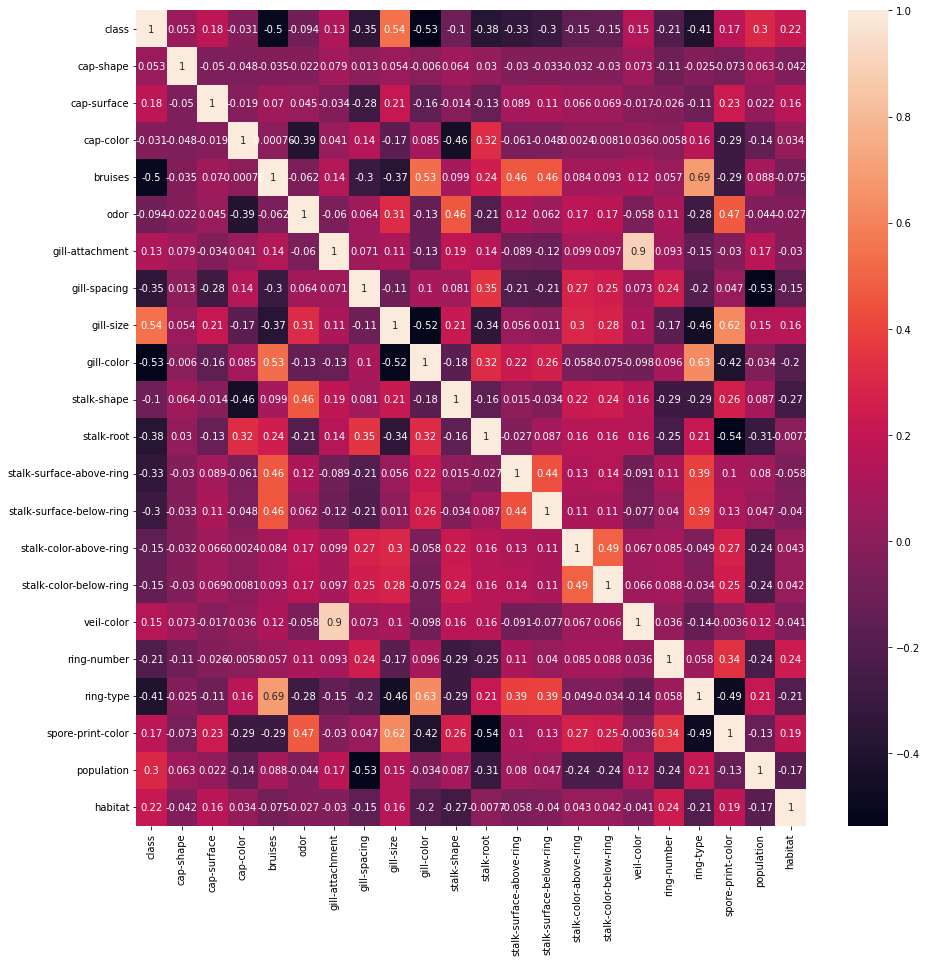

In [34]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

gill-colur, bruise and ring-type has highhest negative-correlation with class.

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=102)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
sc = f1_score(y_test, y_pred)
sc

In [ ]:
rs = recall_score(y_test, y_pred)
rs

In [ ]:
ps = precision_score(y_test, y_pred)
ps

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

# 1. Tuning logistic regression

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

CLearly performance increase by more than 1% in cases of higher values of C

# 2. Applyng and tuning Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier

# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Giving poor performance even less than simple Logistic regression

# 3. Applyng and tuning KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Std deviation is 0 if we are using manhattan metric cases, lets see some more classifiers

# 4. Applyng and tuning Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Performing very good in cases of higher values of C

# 5. Applyng and tuning Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Giving best results in all the cases, also seems faster than others so Bagging Classifier is clearly the winner model

In [ ]:
import pickle

oe = OrdinalEncoder()
X = df.drop(['class', 'veil-type'], axis=1)
y = df['class']
y = np.array(y).reshape(-1,1)

X = oe.fit_transform(X)

y = oe.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=12)

# define models and parameters
model = BaggingClassifier(n_estimators=10)
model.fit(X_train, y_train)

In [ ]:
yp = model.predict([[0, 2, 4, 0, 5, 0, 0, 0, 5, 0, 0, 2, 2, 5, 5, 1, 1, 4, 3, 4, 2]])
yp

In [ ]:
yp[0]==0

In [ ]:
# le = LabelEncoder()
# le.fit(processed_data[col])

# def data_preprocessing(data):
#     processed_data = data.drop('veil-type', axis=1)
#     for col in processed_data.columns:
#         processed_data[col] = le.transform(processed_data[col])

#     return processed_data


# def model_training(processed_df):
#     X = processed_df.drop('class', axis=1)
#     y = processed_df['class']

#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.33, random_state=102)

#     # define models and parameters
#     model = BaggingClassifier(n_estimators=10)
#     model.fit(X_train, y_train)

#     return model

In [ ]:
specifications = {
'cap-shape': 'b',
'cap-surface':'s',
'cap-color':'w',
'bruises':'t',
'odor':'l',
'gill-attachment':'f',
'gill-spacing':'c',
'gill-size':'b',
'gill-color':'n',
'stalk-shape':'e',
'stalk-root':'c',
'stalk-surface-above-ring':'s',
'stalk-surface-below-ring':'s',
'stalk-color-above-ring':'w',
'stalk-color-below-ring':'w',
'veil-color':'w',
'ring-number':'o',
'ring-type':'p',
'spore-print-color':'n',
'population':'n',
'habitat':'m'}

In [ ]:
sp = pd.DataFrame(specifications, index=[0])
sp

In [ ]:
import pickle
oe1 = OrdinalEncoder()
X = df.drop(['class', 'veil-type'], axis=1)
X = oe1.fit_transform(X)
pickle.dump(oe1, open('oe1.pkl', 'wb'))

In [ ]:
oe = pickle.load(open('oe1.pkl', 'rb'))
sample = pd.DataFrame(specifications, index=[0])   # or pd.DataFrame(specifications, index=[0])
# sample.drop('veil-type', axis=1, inplace=True)
processed_sample = oe1.transform(sample)
result = model.predict(processed_sample)

In [ ]:
result